# More Evaluation Metrics

- Precision/Recall Curves
- ROC and AUC
- Multiclass Evaluation

| **Recall Oriented Task** | **Precision Oriented Task** |
| ------------------------  | ---------------------------  |
| Tumor Detection           | Search Engine Results |

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split

### Adapting the Classifier

Depending on the application, we may want to change the classifier and its threshold for class membership.  Here, we look at the ability of the classifier to detect 3's and discuss how we might be interested in changing the threshold.

In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target
X_test, X_train, y_test, y_train = train_test_split(X, y)

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
y_train = (y_train == 3)
y_test = (y_test == 3)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lgr = LogisticRegression()

In [8]:
cross_val_score(lgr, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.96666667, 0.96666667, 0.96      ])

In [9]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
lgr.predict(X_train[312].reshape(1,-1))

array([False])

In [11]:
y_score = lgr.decision_function(X_train[312].reshape(1,-1))

In [12]:
y_score

array([-28.8303588])

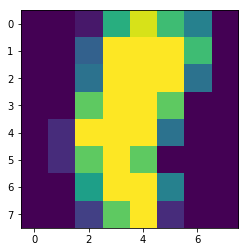

In [13]:
plt.imshow(X_train[312].reshape(8,8))

In [14]:
threshold = 0
y_digit_predict = (y_score > threshold)
y_digit_predict

array([False])

In [15]:
threshold = 2000
y_digit_predict = (y_score > threshold)
y_digit_predict

array([False])

### Adjusting the Threshold

In [16]:
y_pred_prob = lgr.predict_proba(X_test)

In [17]:
y_pred_prob

array([[1.00000000e+00, 1.66626271e-12],
       [9.99999997e-01, 3.31767419e-09],
       [6.36681903e-01, 3.63318097e-01],
       ...,
       [6.57851138e-05, 9.99934215e-01],
       [1.00000000e+00, 6.63081622e-12],
       [1.00000000e+00, 3.51833887e-11]])

In [18]:
y_pred_adjusted = []
for probability in y_pred_prob[1]:
    if probability > .2:
        y_pred_adjusted.append(1)
    else:
        y_pred_adjusted.append(0)

In [19]:
len(y_pred_prob)

1347

In [20]:
len(y_pred_adjusted)

2

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

In [22]:
y_scores = cross_val_predict(lgr, X_train, y_train, cv = 3, method = 'decision_function')

In [23]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

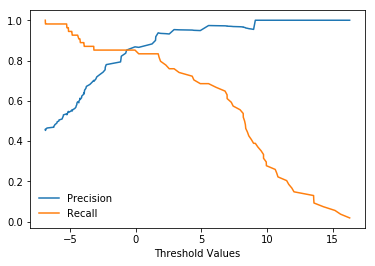

In [24]:
plt.plot(thresholds, precisions[:-1], label = 'Precision')
plt.plot(thresholds, recalls[:-1], label = 'Recall')
plt.xlabel('Threshold Values');
plt.legend(frameon = False);

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, lgr.predict(X_test))

array([[1204,   14],
       [  10,  119]])

### Cancer Example

We want to explore a classification problem using breast cancer data.  Here, our goal is to classify a tumor as malignant or not based on measurements of the tumor.  In this example, we want to consider the nature of the classifier examined, and determine how to alter the boundary to better the classifier to our liking.

- Load and examine data
- Compare `LogisticRegression`, `SGDClassifier`, and a `DummyClassifier`
- Examine Precision vs. Recall curve
- Examine ROC Curve
- Shift Decision Boundary and evaluate

In [27]:
cancer = load_breast_cancer()

In [28]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [29]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.dummy import DummyClassifier

In [30]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [33]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lg_pred = lgr.predict(X_train)
print(confusion_matrix(y_train, lg_pred))

[[150  10]
 [  7 259]]


In [34]:
print(classification_report(y_train, lg_pred))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95       160
          1       0.96      0.97      0.97       266

avg / total       0.96      0.96      0.96       426



In [35]:
from sklearn.model_selection import cross_val_predict

In [36]:
lgr_scores = cross_val_predict(lgr, X_train, y_train, cv = 5, method = 'decision_function')

In [37]:
lgr_scores[:10]

array([ -2.15409421, -12.31308962,   6.76208065,   2.12518497,
         4.49053371, -13.09700382,   3.97577131,  -6.51103011,
        -0.03049724, -11.6203856 ])

### Comparing Precision and Recall

We can visualize the changes that occur accross these metrics together.  To begin, we plot the 



In [38]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

In [39]:
from sklearn.metrics import precision_recall_curve
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_scr = cross_val_predict(lgr, X_train, y_train, cv = 3, method = 'decision_function')
y_scr.shape

(426,)

In [41]:
y_train.shape

(426,)

In [42]:
precisions, recall, threshold = precision_recall_curve(y_test, lgr.predict(X_test))

Text(0,0.5,'Recall')

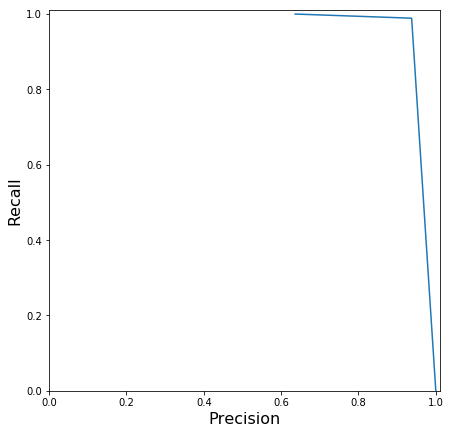

In [43]:
plt.figure(figsize = (7, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precisions, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

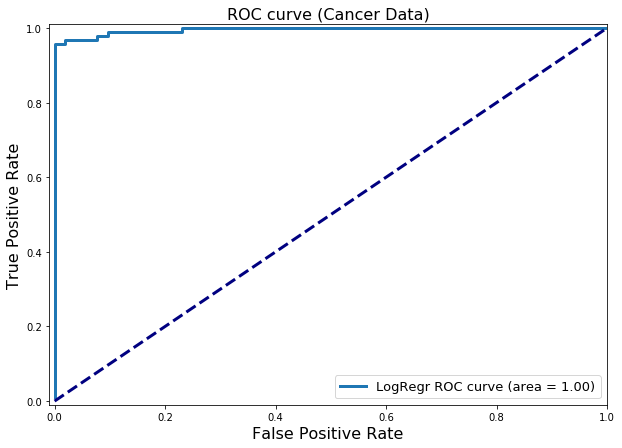

In [44]:
y_score_lr = lgr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (10, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Cancer Data)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

### Other Classifiers

In [45]:
sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_train)
print(confusion_matrix(y_train, sgd_pred))
print(classification_report(y_train, sgd_pred))

[[158   2]
 [ 67 199]]
             precision    recall  f1-score   support

          0       0.70      0.99      0.82       160
          1       0.99      0.75      0.85       266

avg / total       0.88      0.84      0.84       426



In [46]:
dum = DummyClassifier(strategy='most_frequent')
dum.fit(X_train, y_train)
dum_pred = dum.predict(X_train)
print(confusion_matrix(y_train, dum_pred))
print(classification_report(y_train, dum_pred))

[[  0 160]
 [  0 266]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       160
          1       0.62      1.00      0.77       266

avg / total       0.39      0.62      0.48       426



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Digits and Multi-Class Classification

What are the difficult digits to see?

In [47]:
from sklearn.datasets import load_digits
import seaborn as sns
dataset = load_digits()
X, y = dataset.data, dataset.target

In [48]:
lgr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

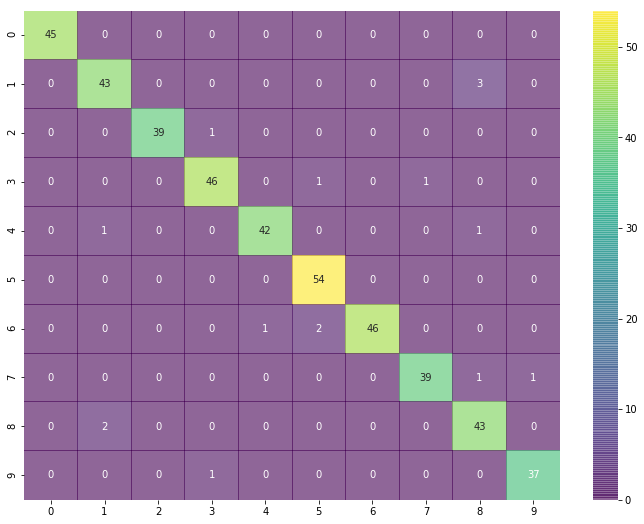

In [51]:
lgr.fit(X_train, y_train)
lg_pred = lgr.predict(X_test)
mat = confusion_matrix(y_test, lg_pred)
plt.figure(figsize = (12, 9))
sns.heatmap(mat, annot = True,fmt="d", cmap="viridis", alpha = 0.6)

In [52]:
print(classification_report(y_test, lg_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.93      0.93      0.93        46
          2       1.00      0.97      0.99        40
          3       0.96      0.96      0.96        48
          4       0.98      0.95      0.97        44
          5       0.95      1.00      0.97        54
          6       1.00      0.94      0.97        49
          7       0.97      0.95      0.96        41
          8       0.90      0.96      0.92        45
          9       0.97      0.97      0.97        38

avg / total       0.97      0.96      0.96       450



### Review



In [63]:
dataset = load_digits()
X, y = dataset.data, dataset.target

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced)

In [65]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
dum = DummyClassifier().fit(X_train, y_train)
lgr = LogisticRegression().fit(X_train, y_train)

In [67]:
dum.score(X_test, y_test)

0.8022222222222222

In [68]:
lgr.score(X_test, y_test)

0.9688888888888889

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
confusion_matrix(y_test, lgr.predict(X_test))

array([[386,   8],
       [  6,  50]])

In [75]:
print(classification_report(y_test, lgr.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       394
          1       0.86      0.89      0.88        56

avg / total       0.97      0.97      0.97       450



In [77]:
#decision function
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lgr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.170884186560407),
 (0, -13.54105022908221),
 (0, -21.718386272242334),
 (0, -18.902993019251518),
 (0, -19.726952688822507),
 (0, -9.74763480642528),
 (1, 5.235061750885),
 (0, -19.31053445177585),
 (0, -25.09573681863401),
 (0, -21.825195685082168),
 (0, -24.15180932383898),
 (0, -19.576847600264813),
 (0, -22.56864544970853),
 (0, -10.827483863027428),
 (0, -11.914197722167824),
 (0, -10.978174793160619),
 (1, 11.208253293289726),
 (0, -27.65478518350546),
 (0, -12.865813200574605),
 (0, -25.85465323039629)]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lgr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.649596273559165e-11),
 (0, 1.3158164309900092e-06),
 (0, 3.696657975565376e-10),
 (0, 6.173543641286965e-09),
 (0, 2.7082776020769783e-09),
 (0, 5.8429713201730555e-05),
 (1, 0.9947017042438665),
 (0, 4.10706161264399e-09),
 (0, 1.2619870321354345e-11),
 (0, 3.322290888774253e-10),
 (0, 3.243334415901077e-11),
 (0, 3.1469340291332454e-09),
 (0, 1.5796544011302842e-10),
 (0, 1.9846138051441534e-05),
 (0, 6.69464178510629e-06),
 (0, 1.7069827634422864e-05),
 (1, 0.9999864383541376),
 (0, 9.765133741528406e-13),
 (0, 2.584915859151697e-06),
 (0, 5.9082454814815585e-12)]

Text(0,0.5,'Recall')

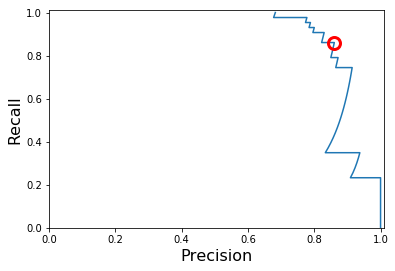

In [81]:
#precision recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

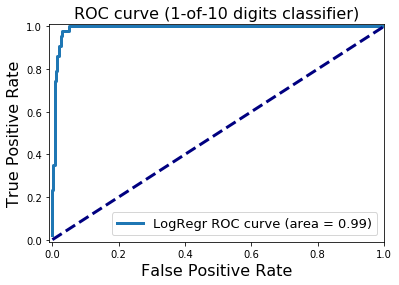

In [83]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lgr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = LogisticRegression()

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91666667 0.97777778 0.96657382 0.98885794 0.94986072]
Cross-validation (AUC) [0.97447912 0.99372437 0.99312006 0.99914001 0.97205022]
Cross-validation (recall) [0.91891892 0.91891892 0.75       0.91666667 0.80555556]


In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = LogisticRegression()
grid_values = {'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'C': 0.1}
Grid best score (accuracy):  0.9732739420935412
Test set AUC:  0.995085995085995
Grid best parameter (max. AUC):  {'C': 0.01}
Grid best score (AUC):  0.9930270809018346


In [86]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
